In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
########################
# Non-Linearity Example
########################
data1 = pd.read_csv('no_linear_data.csv')

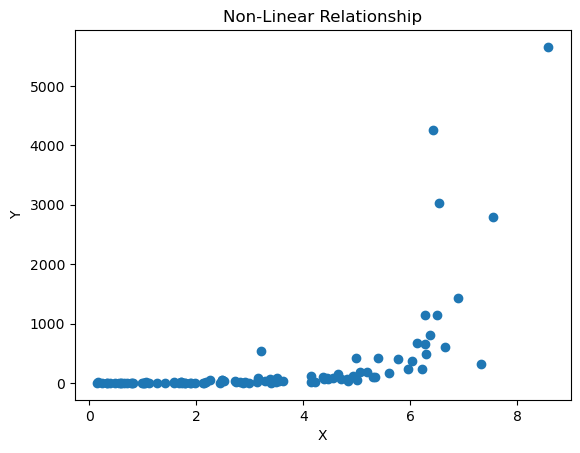

In [3]:
# Plot the data
plt.scatter(data1['X'], data1['Y'])
plt.title("Non-Linear Relationship")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

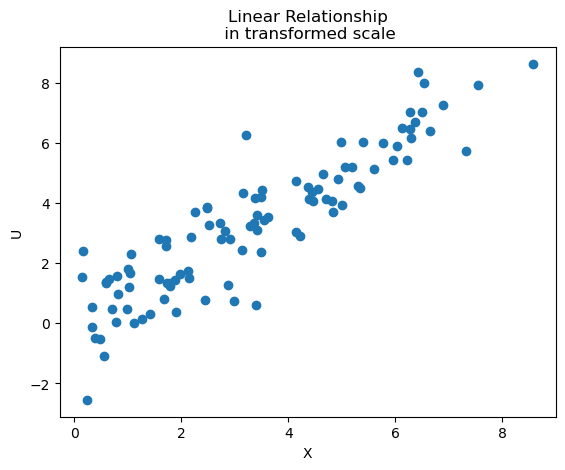

In [4]:
# Transform Y and plot it
data1['U'] = np.log(data1['Y'])
plt.scatter(data1['X'], data1['U'])
plt.title("Linear Relationship\n in transformed scale")
plt.xlabel('X')
plt.ylabel('U')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      U   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     439.6
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           5.34e-38
Time:                        11:35:51   Log-Likelihood:                -140.99
No. Observations:                 100   AIC:                             286.0
Df Residuals:                      98   BIC:                             291.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0688      0.188     -0.365      0.7

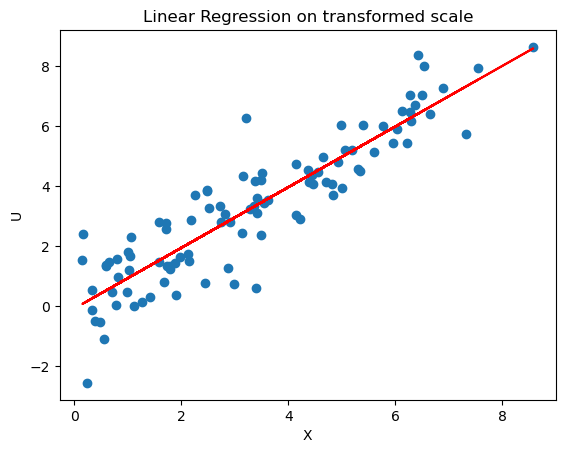

In [5]:
# Run linear regression on the transformed data
X1 = sm.add_constant(data1['X'])
model1 = sm.OLS(data1['U'], X1).fit()

# Print the regression summary
print(model1.summary())

# Plot the estimated regression line
plt.scatter(data1['X'], data1['U'])
plt.title("Linear Regression on transformed scale")
plt.xlabel('X')
plt.ylabel('U')
plt.plot(data1['X'], model1.predict(X1), color='red')
plt.show()

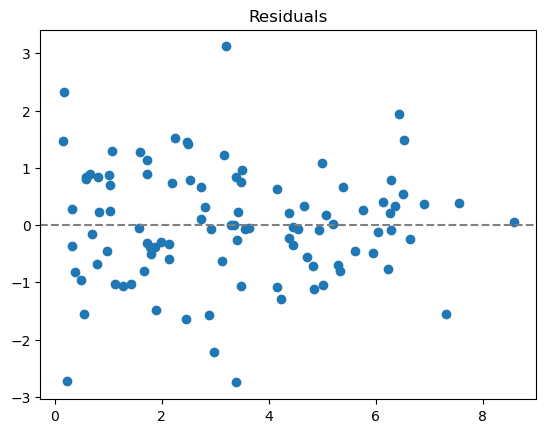

In [6]:
# Predicted values
U_hat = model1.predict(X1)
residuals = data1['U'] - U_hat

# Plot residuals to check if they look random
plt.scatter(data1['X'], residuals)
plt.title("Residuals")
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()

In [7]:
###########################
# Non-independence Example
###########################
data2 = pd.read_csv('no_indep_data.csv')

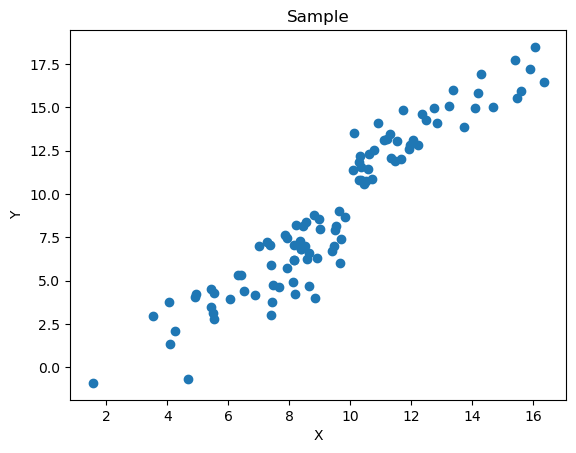

In [8]:
# Plot the data
plt.scatter(data2['X'], data2['Y'])
plt.title("Sample")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     806.9
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           4.22e-49
Time:                        11:36:47   Log-Likelihood:                -181.90
No. Observations:                 100   AIC:                             367.8
Df Residuals:                      98   BIC:                             373.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2902      0.493     -8.704      0.0

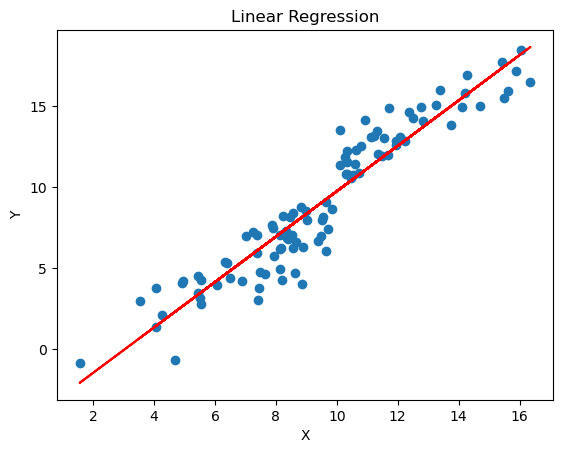

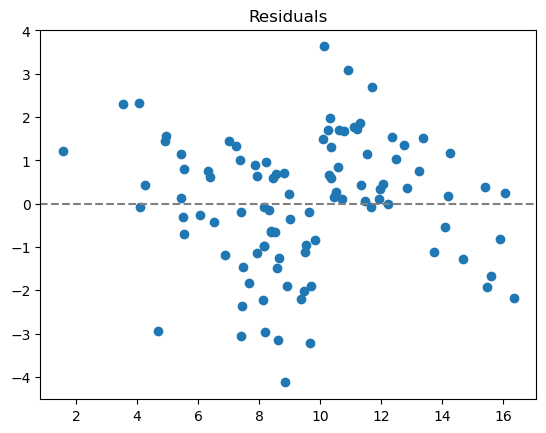

In [9]:
# Run linear regression
X2 = sm.add_constant(data2['X'])
model2 = sm.OLS(data2['Y'], X2).fit()

# Print the regression summary
print(model2.summary())

# Compute the residuals
Y_hat2 = model2.predict(X2)
residuals2 = data2['Y'] - Y_hat2

# Plot the estimated regression line
plt.scatter(data2['X'], data2['Y'])
plt.title("Linear Regression")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(data2['X'], model2.predict(X2), color='red')
plt.show()

# Plot the residuals
plt.scatter(data2['X'], residuals2)
plt.title("Residuals")
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()

In [10]:
## The residuals show an unexplained patter. 
## To fix it we could use Multiple Linear regression (future lecture)


In [11]:
##########################
# Heteroscedastic Example
##########################
data3 = pd.read_csv('heterosc_data.csv')

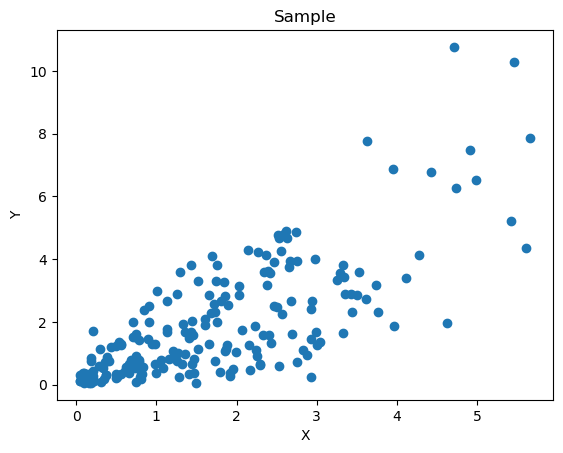

In [12]:
# Plot the data
plt.scatter(data3['X'], data3['Y'])
plt.title("Sample")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     246.2
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           1.37e-36
Time:                        11:37:35   Log-Likelihood:                -327.90
No. Observations:                 200   AIC:                             659.8
Df Residuals:                     198   BIC:                             666.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.150      0.481      0.6

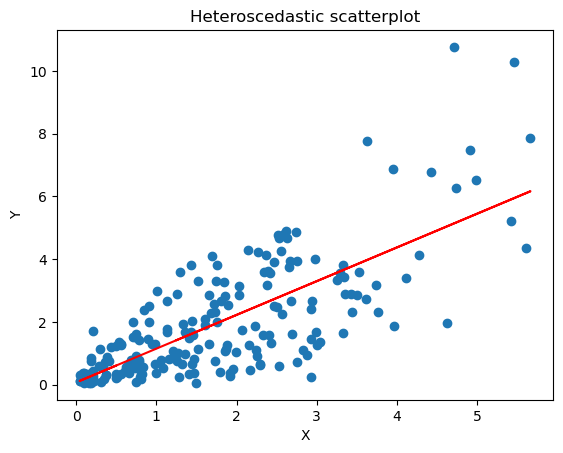

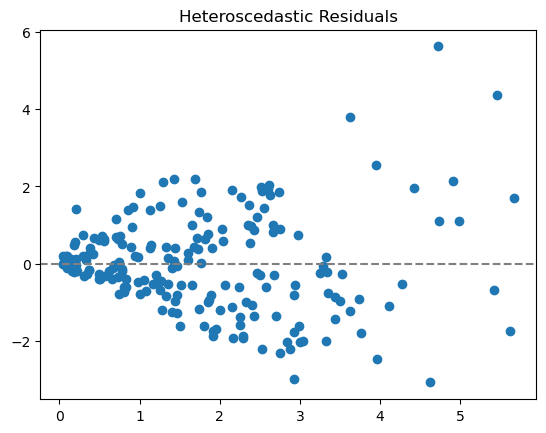

In [13]:
# Try to run linear regression
X3 = sm.add_constant(data3['X'])
model3 = sm.OLS(data3['Y'], X3).fit()

# Print the regression summary
print(model3.summary())

# Compute residuals
Y_hat3 = model3.predict(X3)
residuals3 = data3['Y'] - Y_hat3

# Plot the data
plt.scatter(data3['X'], data3['Y'])
plt.title("Heteroscedastic scatterplot")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(data3['X'], model3.predict(X3), color='red')
plt.show()

# Plot the residuals
plt.scatter(data3['X'], residuals3)
plt.title("Heteroscedastic Residuals")
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      U   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     187.4
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           1.85e-30
Time:                        11:37:57   Log-Likelihood:                -241.64
No. Observations:                 200   AIC:                             487.3
Df Residuals:                     198   BIC:                             493.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9050      0.097     -9.295      0.0

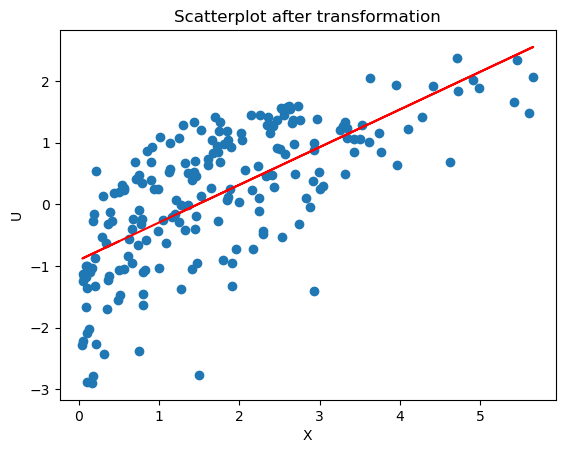

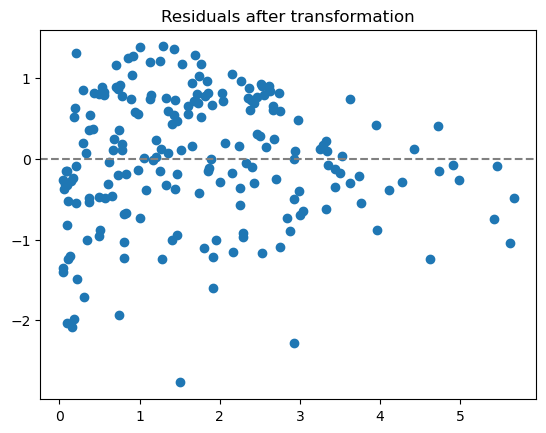

In [14]:
# Transform data and rerun the model
data3['U'] = np.log(data3['Y'])
model3b = sm.OLS(data3['U'], X3).fit()

# Print the regression summary after transformation
print(model3b.summary())

# Compute new residuals
U_hat3 = model3b.predict(X3)
residuals_U = data3['U'] - U_hat3

# Plot the data after transformation
plt.scatter(data3['X'], data3['U'])
plt.title("Scatterplot after transformation")
plt.xlabel('X')
plt.ylabel('U')
plt.plot(data3['X'], model3b.predict(X3), color='red')
plt.show()

# Plot the residuals after transformation
plt.scatter(data3['X'], residuals_U)
plt.title("Residuals after transformation")
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()

In [15]:
#############################################
# Outliers - Non-influential Outlier Example
#############################################
data4 = pd.read_csv('outlier1_data.csv')

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     139.3
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           1.36e-20
Time:                        11:38:27   Log-Likelihood:                -157.67
No. Observations:                 101   AIC:                             319.3
Df Residuals:                      99   BIC:                             324.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1517      0.204      0.743      0.4

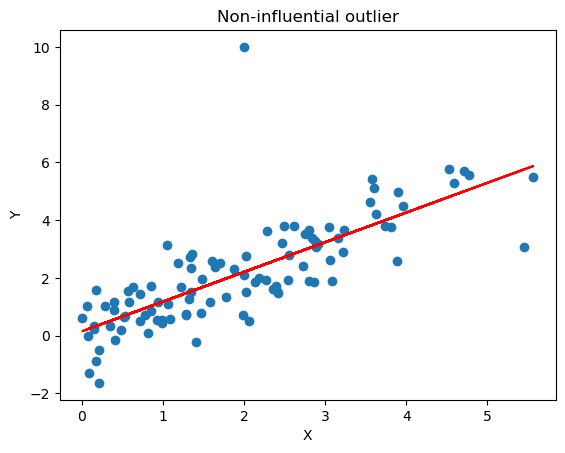

In [16]:
# Run linear regression
X4 = sm.add_constant(data4['X'])
model4 = sm.OLS(data4['Y'], X4).fit()

# Print the regression summary
print(model4.summary())

Y_hat4 = model4.predict(X4)
residuals4 = data4['Y'] - Y_hat4

# Plot the data
plt.scatter(data4['X'], data4['Y'])
plt.title("Non-influential outlier")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(data4['X'], model4.predict(X4), color='red')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           7.31e-29
Time:                        11:40:08   Log-Likelihood:                -126.08
No. Observations:                 100   AIC:                             256.2
Df Residuals:                      98   BIC:                             261.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0797      0.152      0.526      0.6

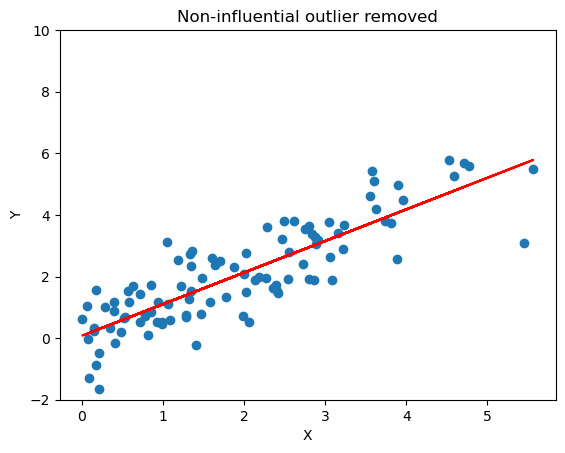

In [19]:
# Remove the outlier and rerun regression
outlier_index = data4['Y'] > 8
data4b = data4[~outlier_index]

# Linear regression after removing the outlier
X4b = sm.add_constant(data4b['X'])
model4b = sm.OLS(data4b['Y'], X4b).fit()

# Print the regression summary after removing the outlier
print(model4b.summary())

Y_hat4b = model4b.predict(X4b)

# Plot the data after removing the outlier (it affects the results)
plt.scatter(data4b['X'], data4b['Y'])
plt.ylim(-2, 10)
plt.title("Non-influential outlier removed")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(data4b['X'], model4b.predict(X4b), color='red')
plt.show()

In [20]:
######################################
# Outliers - Influential Outlier Example
########################################
data5 = pd.read_csv('outlier2_data.csv')

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     48.24
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           4.02e-10
Time:                        11:40:34   Log-Likelihood:                -165.66
No. Observations:                 101   AIC:                             335.3
Df Residuals:                      99   BIC:                             340.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4722      0.195      2.423      0.0

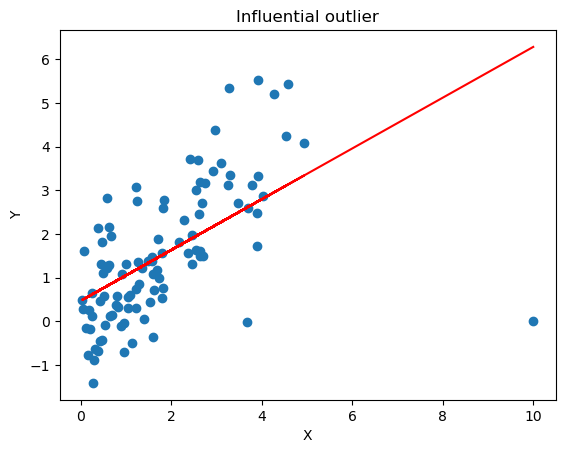

In [21]:
# Run linear regression
X5 = sm.add_constant(data5['X'])
model5 = sm.OLS(data5['Y'], X5).fit()

# Print the regression summary
print(model5.summary())

Y_hat5 = model5.predict(X5)
residuals5 = data5['Y'] - Y_hat5

# Plot the data
plt.scatter(data5['X'], data5['Y'])
plt.title("Influential outlier")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(data5['X'], model5.predict(X5), color='red')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     128.4
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           1.60e-19
Time:                        11:40:59   Log-Likelihood:                -142.00
No. Observations:                 100   AIC:                             288.0
Df Residuals:                      98   BIC:                             293.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0241      0.170     -0.142      0.8

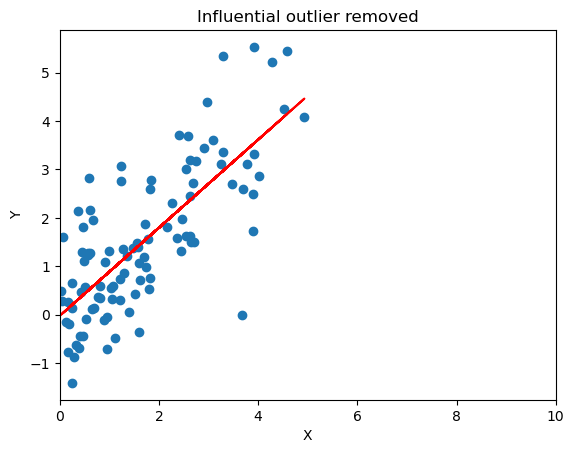

In [23]:
# Remove the influential outlier and rerun regression
outlier_index = data5['X'] > 8
data5b = data5[~outlier_index]

# Linear regression after removing the outlier
X5b = sm.add_constant(data5b['X'])
model5b = sm.OLS(data5b['Y'], X5b).fit()

# Print the regression summary after removing the outlier
print(model5b.summary())

Y_hat5b = model5b.predict(X5b)

# Plot the data after removing the outlier (it did not affect the results)
plt.scatter(data5b['X'], data5b['Y'])
plt.xlim(0, 10)
plt.title("Influential outlier removed")
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(data5b['X'], model5b.predict(X5b), color='red')
plt.show()
